<img src="photo_2018-10-31_16-04-39.jpg" height="420" width="420"  />

$$
C_{LL(i)}= {\frac 1{E\cdot B_e}}\left(\frac {W+a_i}{W-a_i}\right)^2
\left[
2.1630+12.219\left(\frac {a_i}W\right)
-20.065\left(\frac {a_i}W\right)^2
-0.9925\left(\frac {a_i}W\right)^3
+20.609\left(\frac {a_i}W\right)^4
-9.9314\left(\frac {a_i}W\right)^5
\right]
\qquad(A2.10) 
\\
\\
\boldsymbol{where:} \\
B_e \equiv B-\frac{(B-B_N)^2}B 
\qquad\qquad\qquad\qquad\qquad\qquad(A2.11)
\\
\\
$$
___
$$
B \equiv 20. \\
B_N\equiv 0.2 \cdot B \\
E \equiv 200 000. \\
W \equiv 40. \\
$$

In [1]:
class formula_A2_11:
    B= 20.
    BN= 0.2*B
    Be= B - (B-BN)**2/B
    E= 200000.
    W= 40.
    def Cc(self,ai):
        ai_w=ai/self.W
        return (2.1630 + 12.219*ai_w - 20.065*ai_w**2 - 0.9925*ai_w**3 + 20.609*ai_w**4 - 9.9314*ai_w**5) * \
            ( (self.W+ai)/(self.W-ai) )**2./(self.E*self.Be)
#

formula_A2_11().Cc(0.151550581328749)

1.5574580486228237e-06

In [26]:
import numpy as np
from scipy.interpolate import interp1d
%matplotlib inline

In [9]:
crack = np.loadtxt("crack-length_calc1.dat", dtype=np.float)

In [10]:
A2_11=formula_A2_11()
crk=[]
for xx in crack:
    if xx[1]:
        crk.append([xx[1], A2_11.Cc(xx[1]+24.)])

In [11]:
crkk=np.asarray(crk,)

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[16, 10]

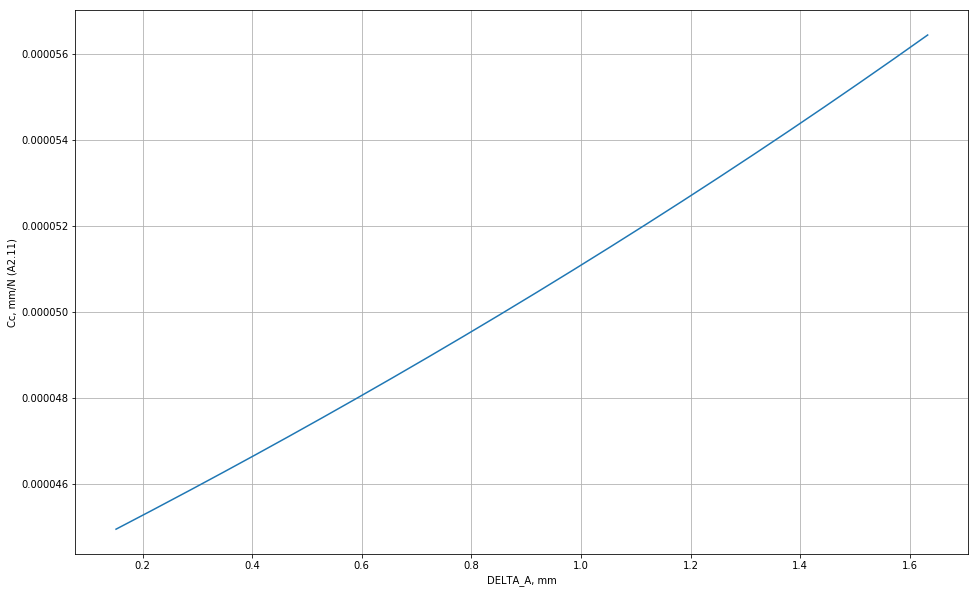

In [14]:
plt.plot(crkk[:,0],crkk[:,1])
plt.xlabel('DELTA_A, mm')
plt.ylabel('Cc, mm/N (A2.11)')
plt.grid()
plt.show() 

In [25]:
from scipy.interpolate import interp1d
f_interp = interp1d(crkk[:,0],crkk[:,1], bounds_error=False)
print(f_interp([0.17, 0.2, 0.3, 0.4]))

[4.50599952e-05 4.52602500e-05 4.59366416e-05 4.66268404e-05]


In [22]:
np

<module 'numpy' from '/opt/anaconda2/lib/python2.7/site-packages/numpy/__init__.pyc'>

In [16]:
force = np.loadtxt("FORCE_CMOD_calc1.dat", dtype=np.float)

In [17]:
force

array([[0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e-03, 1.73770e-03, 1.16225e+01],
       [2.00000e-03, 3.47545e-03, 2.32385e+01],
       ...,
       [9.98000e-01, 1.97705e+00, 1.57314e+03],
       [9.99000e-01, 1.97910e+00, 1.57241e+03],
       [1.00000e+00, 1.98115e+00, 1.57164e+03]])

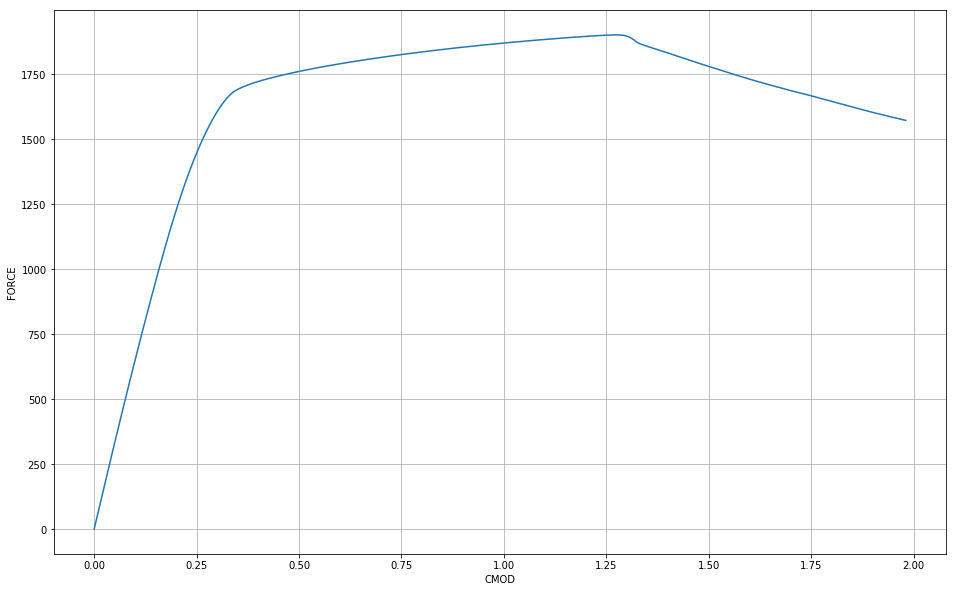

In [19]:
#INST CMOD FORCE
plt.plot(force[:,1],force[:,2])
plt.xlabel('CMOD')
plt.ylabel('FORCE')
plt.grid()
plt.show() 

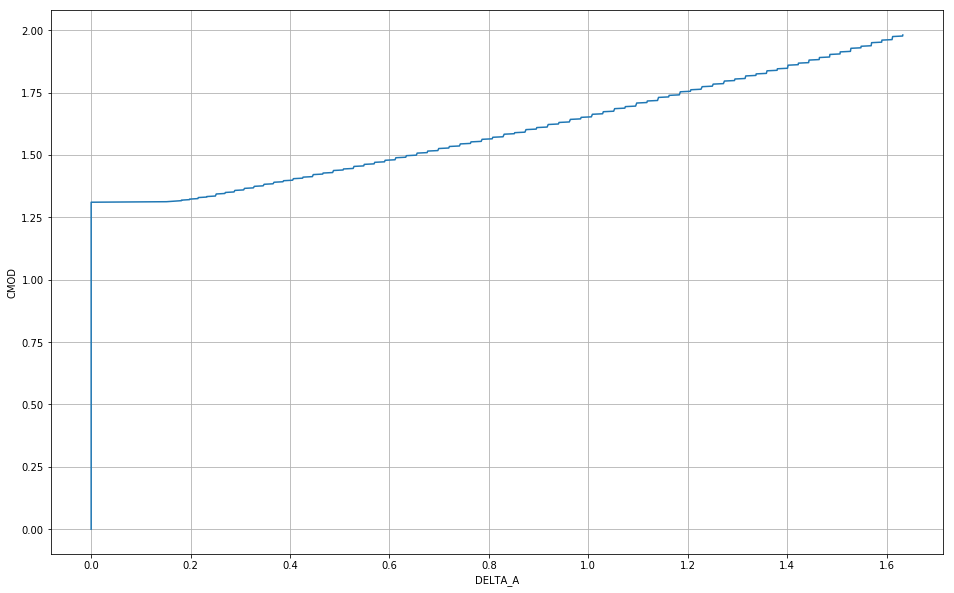

In [20]:
plt.plot(crack[:,1],force[:,1])
plt.xlabel('DELTA_A')
plt.ylabel('CMOD')
plt.grid()
plt.show() 

In [ ]:
"""
Delta a => CMOD
Delta a => C
"""

In [35]:
crack[:,1],force[:,1]

(array([0.        , 0.        , 0.        , ..., 1.63225564, 1.63243347,
        1.63262329]),
 array([0.00000e+00, 1.73770e-03, 3.47545e-03, ..., 1.97705e+00,
        1.97910e+00, 1.98115e+00]))